In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

In [2]:
df = pd.read_csv("data.csv")

df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
df.info()

# Missing value in Credit_limit and Minimum_payment

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


It looks like some columns has outliers, such as PURCHASES, CASH_ADVANCE, and PAYMENTS have outliers.

### Drop redundant id column

In [5]:
# Drop redundant id column
df = df.drop(columns='CUST_ID', axis=1)

### Fill in Missing values

In [6]:
for col in df.columns:
    df[col].fillna(df[col].mean(), inplace = True)

### Plot columns

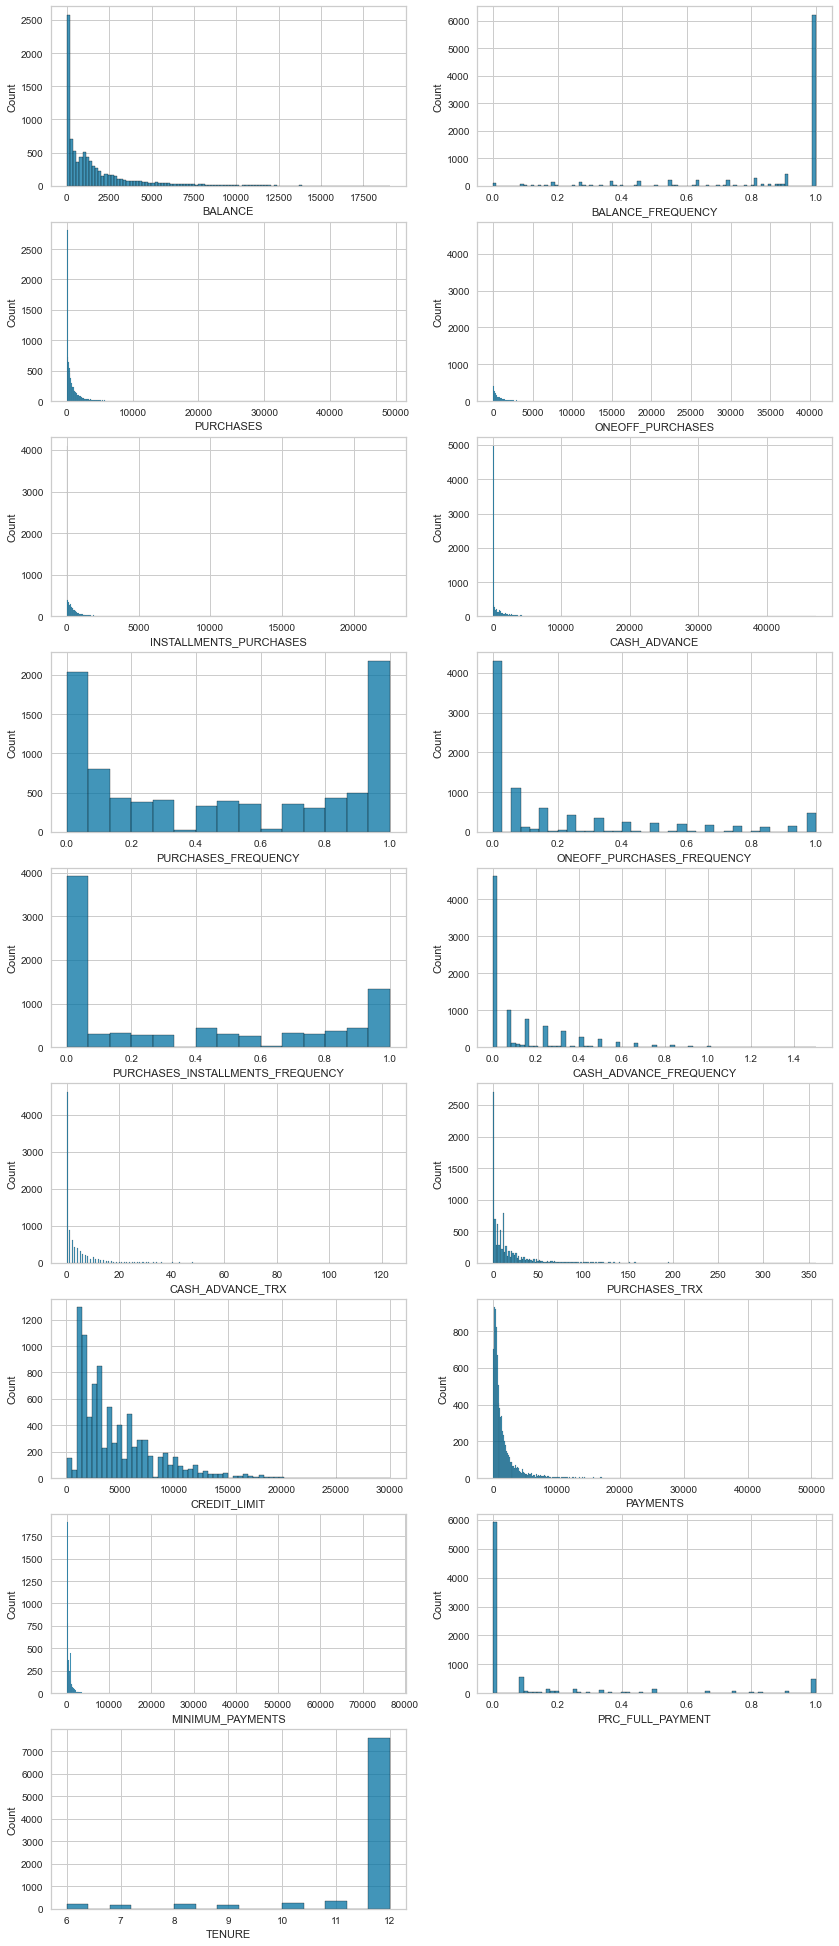

In [7]:
# PLot columns

plt.figure(figsize=(14,35))

for i, col in enumerate(df.columns):
    plt.subplot(9, 2, i+1)
    sns.histplot(x=col, data=df)

### Removing Outliers

In [8]:
# Check for some outliers

df[df.PURCHASES > 10000]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
125,2392.917738,1.000000,12462.44,12462.44,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,217,2800.0,11628.715570,2000.990921,0.000000,12
138,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.013310,0.000000,12
171,975.942008,1.000000,10221.35,7141.38,3079.97,1620.685551,1.000000,1.000000,0.833333,0.583333,18,130,10500.0,10693.495850,347.641073,0.750000,12
204,4559.779234,1.000000,10848.50,8208.00,2640.50,0.000000,1.000000,0.666667,1.000000,0.000000,0,123,7500.0,9423.715495,2925.275522,0.000000,12
220,9047.621884,1.000000,11188.62,6099.16,5089.46,0.000000,1.000000,0.750000,1.000000,0.000000,0,151,10000.0,11994.418150,8517.258683,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,348.342172,0.909091,11878.25,7958.96,3919.29,0.000000,1.000000,1.000000,0.416667,0.000000,0,103,6000.0,11845.841240,156.683560,0.600000,12
7046,2980.054695,0.818182,26784.62,26514.32,270.30,0.000000,0.583333,0.500000,0.083333,0.000000,0,33,30000.0,30029.014960,11853.796130,0.750000,12
7277,561.003319,1.000000,11577.00,10975.00,602.00,875.583070,1.000000,1.000000,0.500000,0.250000,6,97,5500.0,12148.503510,188.413837,0.666667,12
7378,4228.417754,1.000000,11994.71,11994.71,0.00,496.521561,0.250000,0.250000,0.000000,0.083333,2,8,13450.0,508.797444,1725.645623,0.000000,12


In [9]:
outlier_check_col = df[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
                     'PAYMENTS', 'MINIMUM_PAYMENTS']]

for col in outlier_check_col:
    mean = df[col].mean()
    std = df[col].std()
    upper_limit = mean + 3*std
    lower_limit = mean - 3*std
    outliers = df[(df[col] > upper_limit) | (df[col] < lower_limit)]

outliers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
19,3577.970933,1.000000,398.64,0.00,398.64,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4000.0,1053.980464,12465.549380,0.000000,12
20,2016.684686,1.000000,176.68,0.00,176.68,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,2000.0,223.068600,13557.297260,0.000000,12
34,3517.101616,0.727273,547.28,0.00,547.28,0.000000,1.000000,0.000000,1.000000,0.000000,0,14,11000.0,8735.607835,17862.558310,0.000000,12
78,1205.716678,1.000000,0.00,0.00,0.00,38.325801,0.000000,0.000000,0.000000,0.083333,1,0,1200.0,29.278671,8242.687678,0.000000,12
90,9381.255094,1.000000,5100.07,1147.83,3952.24,370.737197,1.000000,0.250000,0.916667,0.083333,1,46,9000.0,6409.496345,9827.045323,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,1410.909779,1.000000,698.88,0.00,698.88,948.848018,1.000000,0.000000,1.000000,0.166667,8,12,1200.0,79.578186,11795.280960,0.083333,12
8470,2046.727519,0.818182,1369.72,422.44,947.28,1817.810563,0.750000,0.166667,0.666667,0.166667,4,17,2500.0,242.742734,10729.194160,0.000000,12
8614,1182.080141,1.000000,266.68,0.00,266.68,848.848179,0.666667,0.000000,0.666667,0.083333,6,8,1000.0,119.861878,8607.234543,0.000000,12
8688,2898.484109,1.000000,0.00,0.00,0.00,3021.097135,0.000000,0.000000,0.000000,0.272727,5,0,3000.0,230.794237,13916.085930,0.000000,11


In [10]:
# Drop a total of 102 rows from dataset

df = df.drop(index=outliers.index)
df = df.reset_index(drop=True)

df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8843,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8844,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8845,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8846,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### Correlation matrix

<AxesSubplot:>

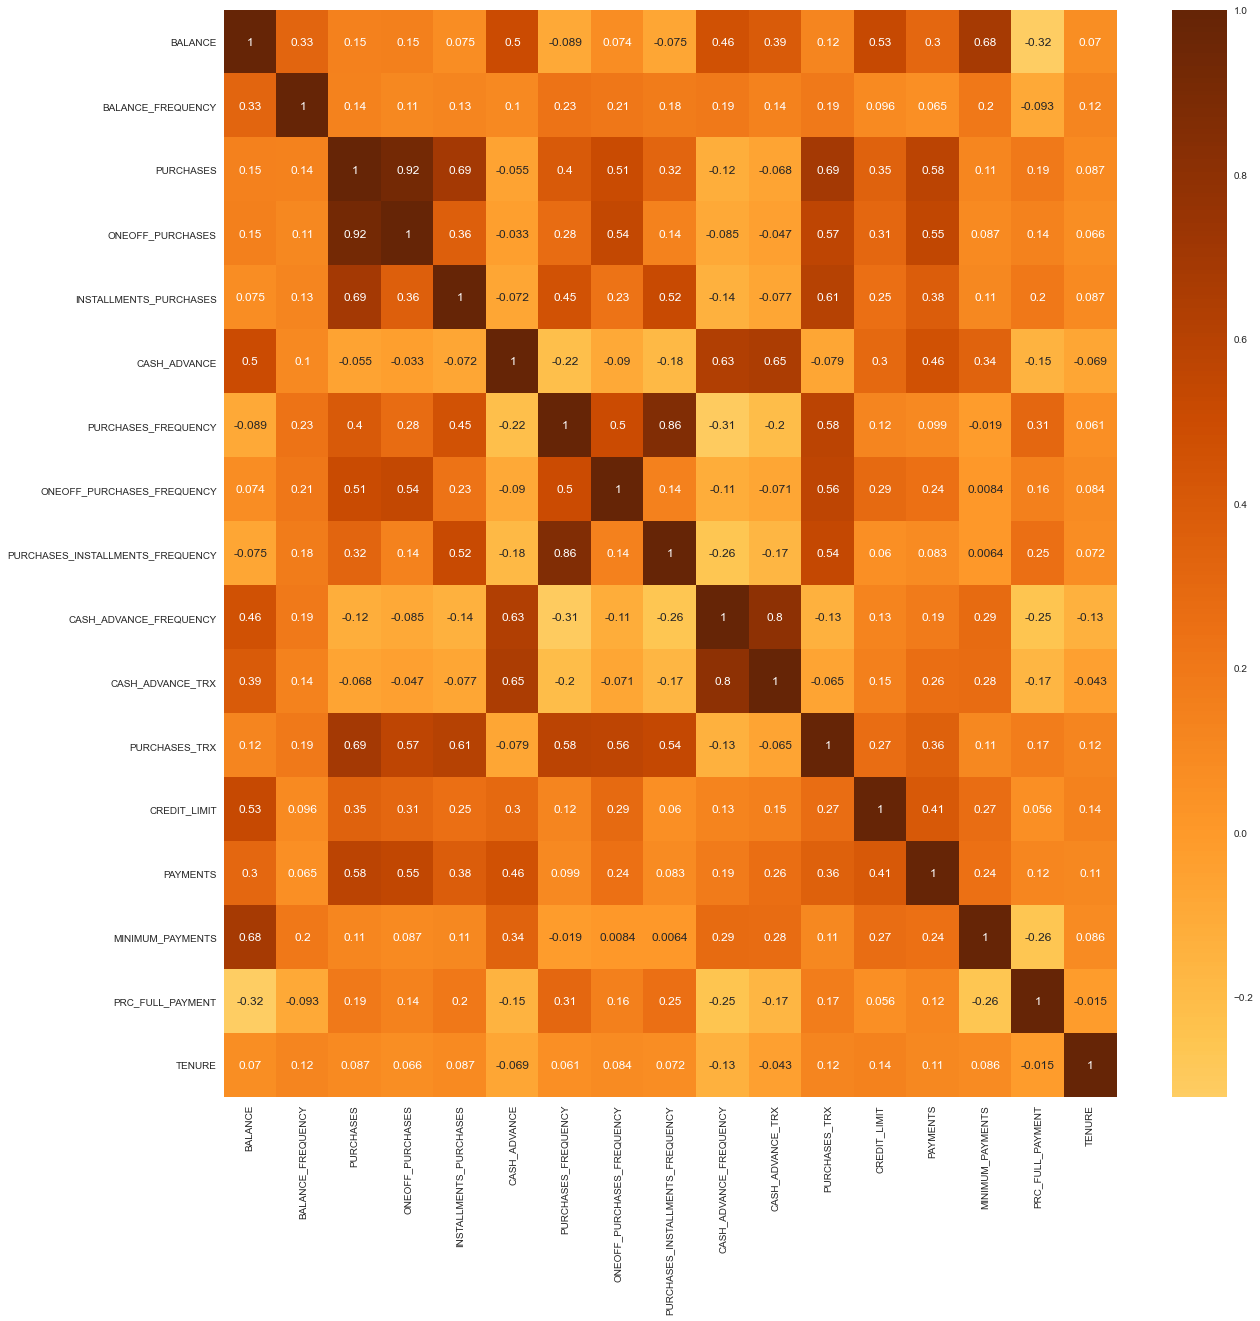

In [11]:
#correlation matrix

corr= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corr,annot=True, center=0, cmap='YlOrBr')

### Standardization

In [12]:
sc = StandardScaler()
df1 = df
df1_scaled = pd.DataFrame(sc.fit_transform(df1),columns= df1.columns )

df1_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.735091,-0.242996,-0.434497,-0.370839,-0.357324,-0.467442,-0.805691,-0.681027,-0.704902,-0.675588,-0.475310,-0.519382,-0.962837,-0.533857,-0.594035,-0.529044,0.362255
1,0.827807,0.139128,-0.481097,-0.370839,-0.469393,2.619926,-1.221239,-0.681027,-0.914947,0.572703,0.111012,-0.602485,0.694469,0.841919,0.437967,0.227713,0.362255
2,0.478149,0.521253,-0.103423,0.118761,-0.469393,-0.467442,1.272046,2.662175,-0.914947,-0.675588,-0.475310,-0.103865,0.832578,-0.385649,-0.054404,-0.529044,0.362255
3,0.068597,-1.007245,0.251127,0.578384,-0.469393,-0.368831,-1.013466,-0.402428,-0.914947,-0.259492,-0.328729,-0.560933,0.832578,-0.605022,0.207706,-0.529044,0.362255
4,-0.351079,0.521253,-0.473282,-0.360707,-0.469393,-0.467442,-1.013466,-0.402428,-0.914947,-0.675588,-0.475310,-0.560933,-0.907593,-0.365806,-0.477561,-0.529044,0.362255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8843,-0.741225,0.521253,-0.338893,-0.370839,-0.127406,-0.467442,1.272046,-0.681027,1.185509,-0.675588,-0.475310,-0.353175,-0.962837,-0.490201,-0.694293,1.173662,-4.099788
8844,-0.745827,0.521253,-0.334555,-0.370839,-0.116974,-0.467442,1.272046,-0.681027,1.185509,-0.675588,-0.475310,-0.353175,-0.962837,-0.507739,0.207706,-0.529044,-4.099788
8845,-0.743743,-0.179311,-0.410562,-0.370839,-0.299762,-0.467442,0.856498,-0.681027,0.765419,-0.675588,-0.475310,-0.394727,-0.962837,-0.576362,-0.657196,0.322309,-4.099788
8846,-0.748658,-0.179311,-0.481097,-0.370839,-0.469393,-0.449923,-1.221239,-0.681027,-0.914947,0.156608,-0.182149,-0.602485,-1.100945,-0.586491,-0.686694,0.322309,-4.099788


### Apply PCA for Dimension Reduction

In [13]:
pca = PCA(n_components = 3)
pca_features = pca.fit_transform(df1_scaled)

pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2', 'PC3'])

pca_df

,PC1,PC2,PC3
0,-1.726634,-1.158069,0.431981
1,-1.121128,2.573022,0.679532
2,0.977616,-0.324593,-0.113821
3,-0.850208,0.119278,1.292284
4,-1.640205,-0.739942,0.282801
...,...,...,...
8843,-0.397088,-2.111796,-0.863385
8844,-0.551187,-1.502022,-1.331771
8845,-0.968592,-1.900769,-0.376415
8846,-2.382185,-0.822030,1.136832


### Clustering

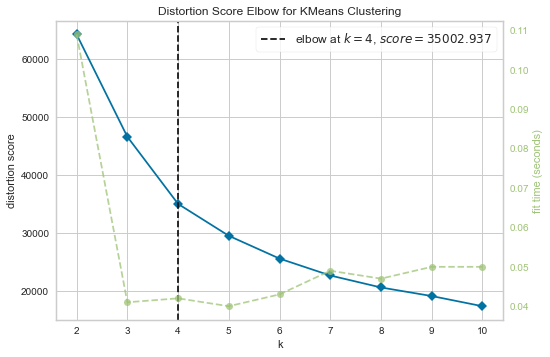

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
# Elbow method 

elbow = KElbowVisualizer(KMeans(n_init='auto', random_state=0), k=10)
elbow.fit(pca_df)
elbow.show()

In [15]:
kmeans = KMeans(n_clusters = 4, random_state = 0, n_init='auto')
kmeans.fit(df1)
df['Cluster'] = kmeans.predict(df1)

df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8843,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8844,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8845,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8846,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


### Cluster Visualization

Text(0.5, 1.0, 'Cluster counts')

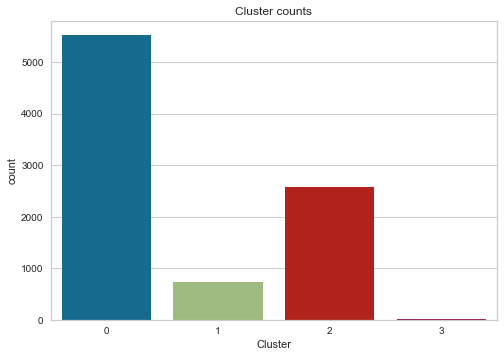

In [16]:
sns.countplot(data=df, x='Cluster')
plt.title('Cluster counts')

In [17]:
# Counting clusters
df.Cluster.value_counts()

0    5522
2    2578
1     724
3      24
Name: Cluster, dtype: int64

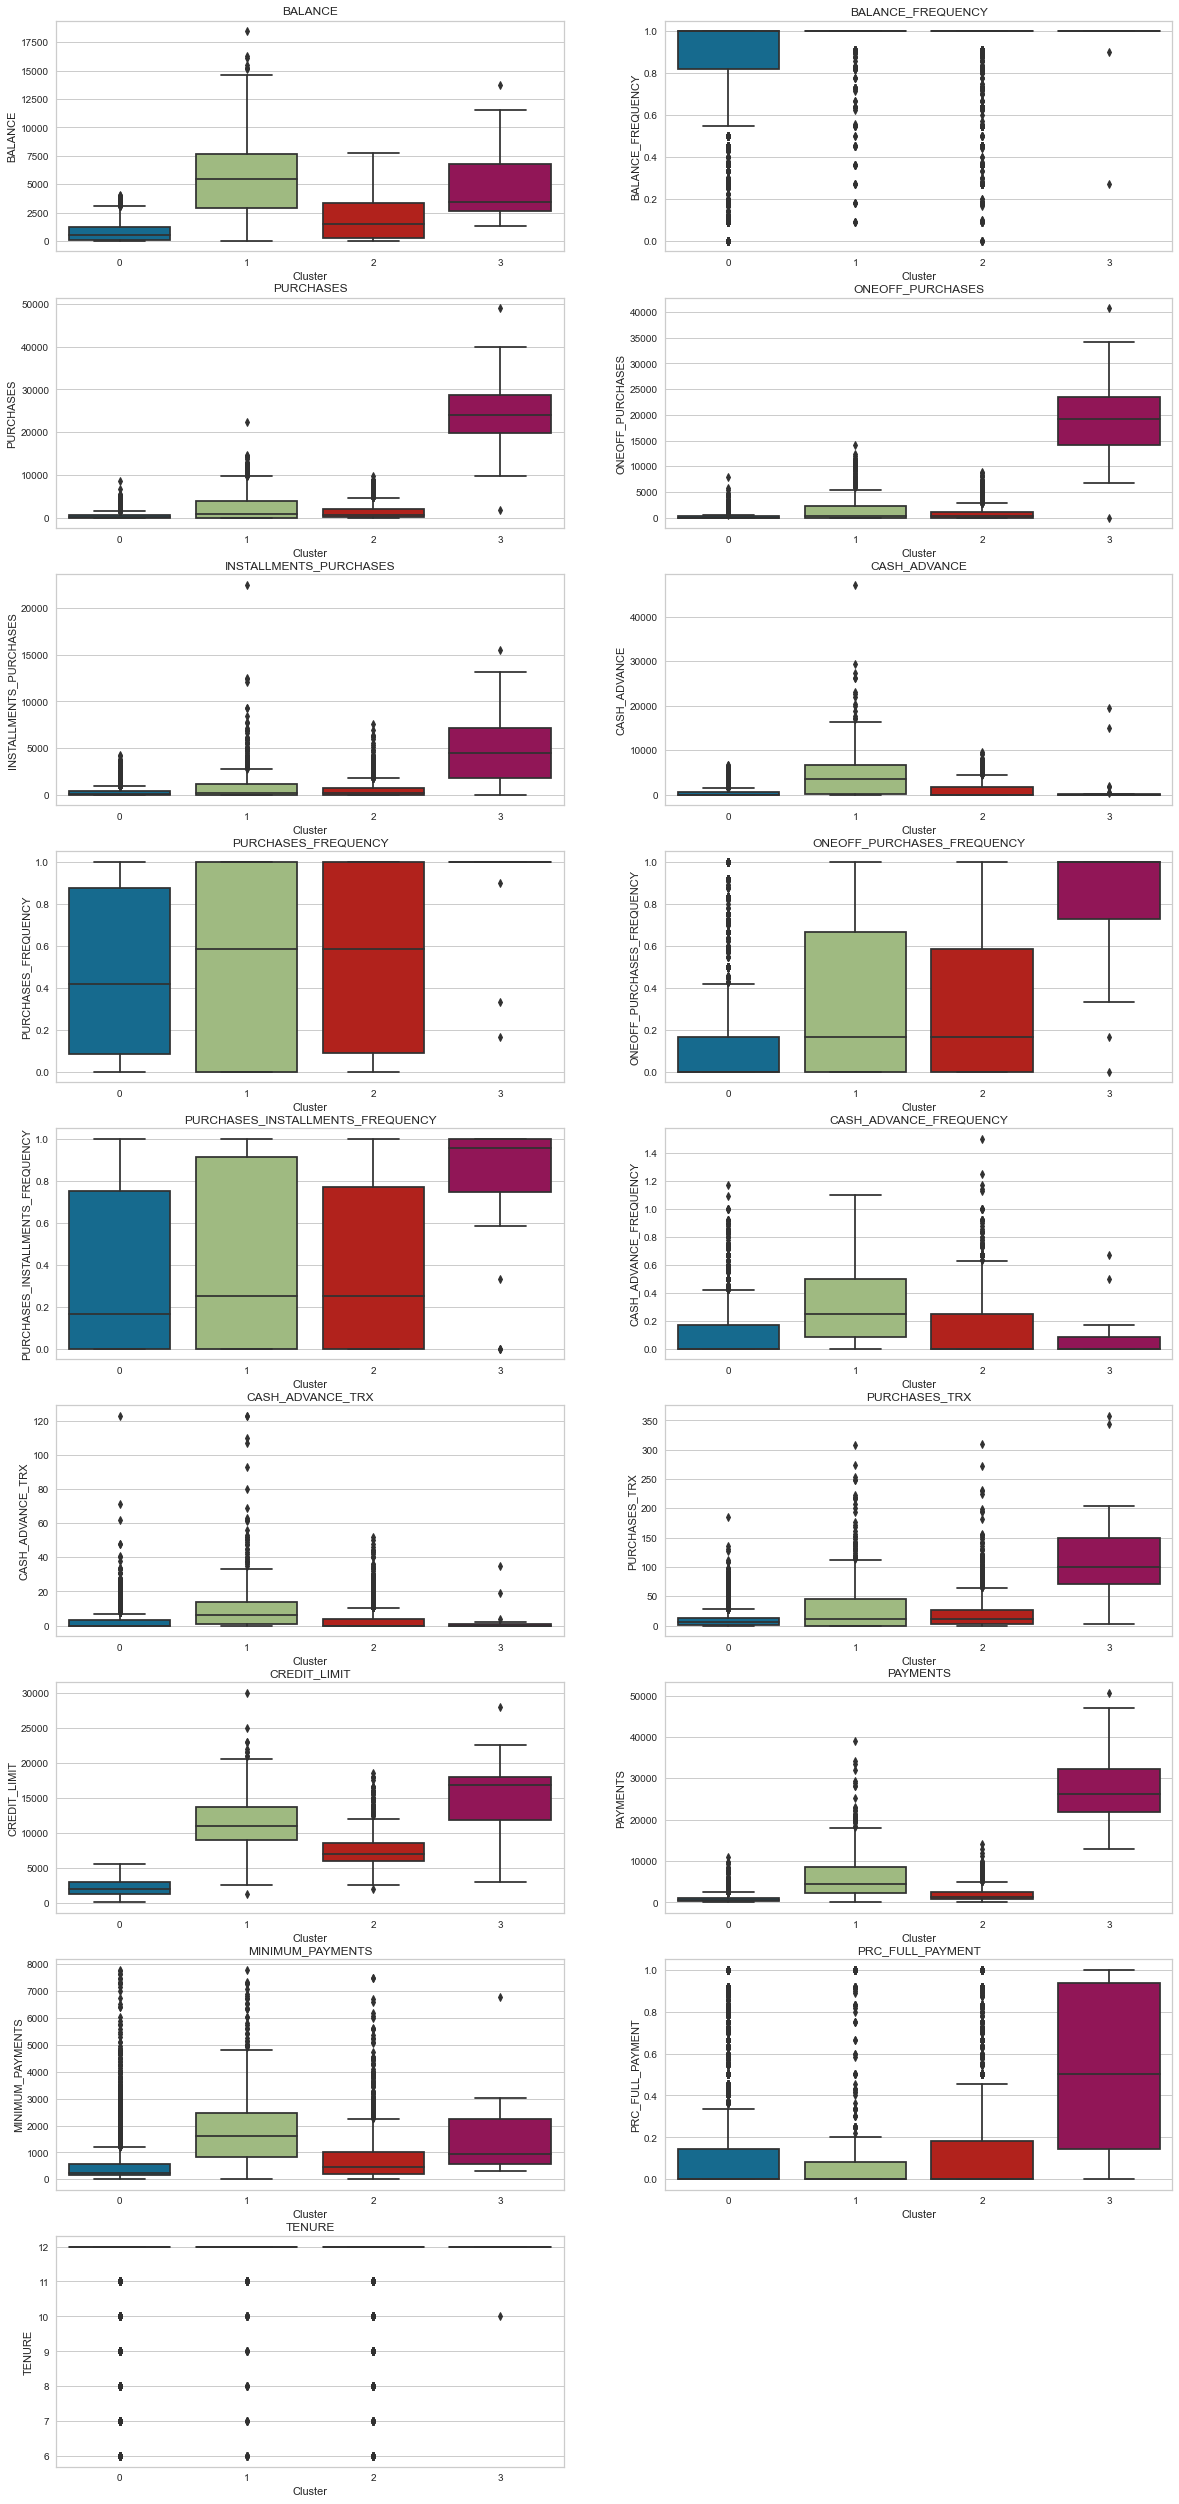

In [18]:
columns = df.loc[:, df.columns != 'Cluster']
plt.figure(figsize = (20,45))

for i, col in enumerate(columns):
    plt.subplot(9, 2, i + 1)
    sns.boxplot(data=df, x='Cluster', y=col)
    plt.title(col)

<AxesSubplot:xlabel='PURCHASES', ylabel='PAYMENTS'>

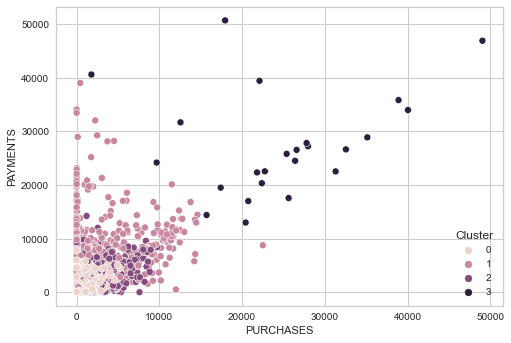

In [19]:
sns.scatterplot(data=df, x='PURCHASES', y='PAYMENTS', hue='Cluster')

<AxesSubplot:xlabel='BALANCE', ylabel='PAYMENTS'>

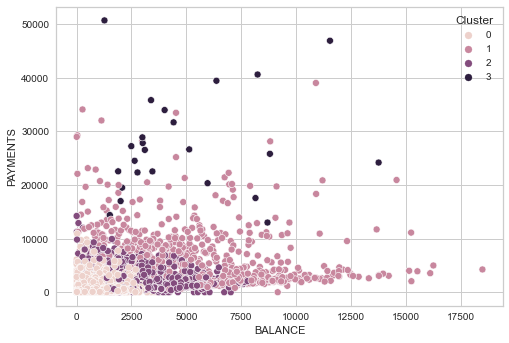

In [20]:
sns.scatterplot(data=df, x='BALANCE', y='PAYMENTS', hue='Cluster')

### Cluster Findings

As seen above, the k Mean algorithm produced 4 clusters. The visualization of clusters is plotted to study the insight of each of them. We can conclude each of the clusters as:

|Cluster| Properties|
| --- | :--- | 
| **Cluster 0** | (1) Minimum balance |
|               | (2) Minimum purchases|
|               | (3) Low oneoff purchases frequency |
|               | (4) Medium installment purchases frequency |
|               | (5) Low cash advancement frequency |
|               | (6) Minimum credit limit |
|               | (7) Minimum payments |
| **Cluster 1** |(1) High balance |
|               |(2) Low to medium purchases |
|               |(3) Medium oneoff purchases frequency |
|               |(4) Medium installment purchases frequency |
|               |(5) Medium cash advancement frequency |
|               |(6) Medium to high credit limit |
|               |(7) Low to medium payments |
| **Cluster 2** |(1) Low balance |
|               |(2) Minimum purchases |
|               |(3) Medium oneoff purchases frequency |
|               |(4) Medium installment purchases frequency |
|               |(5) Low cash advancement frequency |
|               |(6) Medium credit limit |
|               |(7) Minimum payments |
| **Cluster 3** |(1) Medium balance |
|               |(2) High purchases |
|               |(3) High oneoff purchases frequency |
|               |(4) High installment purchases frequency |
|               |(5) Minimum cash advancement frequency |
|               |(6) Medium to high credit limit |
|               |(7) High payments |

### Conclusion

To summarize, **cluster 0** is the customer group that is inactive in using credit card to make purchases. They have minimum credit limit, minimum credit card balance, low purchases frequency, and minimum payment. There are 5522 customers in this group. **Cluster 1** is the customer group that have medium level in purchases. They have medium to high credit limit, but they have a low to medium level payments. So, they ended up have high credit card balance. There are 2578 customers in cluster 1. **Cluster 2** is the customer group that do not frequently use credit card to make purchases. They have a minimum level of purchases and payments, however, they have a medium level of credit limit. Also, they have a low credit card balance. There are 724 customers in cluster 2. **Cluster 3** is the active credit card user group that have high level of purchases and payments. They have a high level in both oneoff and installment purchases frequency, and they have a medium level of credit card balance. There are 24 customers in cluster 3.

The credit card company could make good earnings through the interest payments from customers in cluster 1. Moreover, they could make good earnings through the transaction fees from customers in cluster 3, as they have a high level of purchases frequency. Overall, the marketing team should develop strategies for the customers in these two clusters.

